In [ ]:
%pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ synthesize==2.0

In [1]:
# from tools import get_data_metrics, visualize, eval_classifier, vis_classifier
from synthesize.tools import get_data_metrics, visualize, eval_classifier, vis_classifier
import pandas as pd
import numpy as np

plotnine is already installed.
pandas is already installed.
matplotlib is already installed.
seaborn is already installed.
xgboost is already installed.
numpy is already installed.
scipy is already installed.


# PRADSubtype quality evaluation

C:\Users\Lucas\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
C:\Users\Lucas\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.


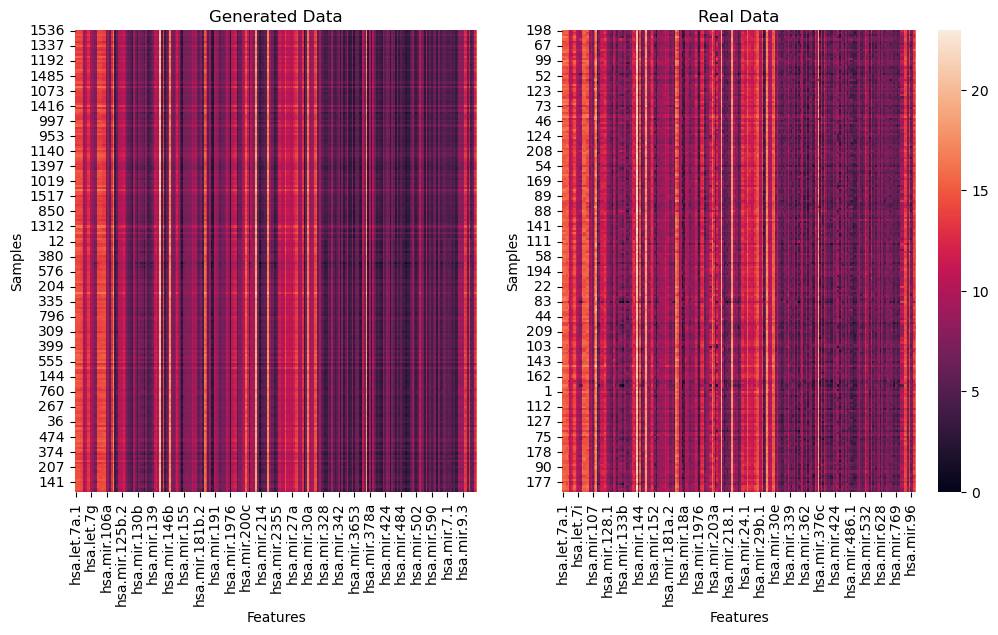

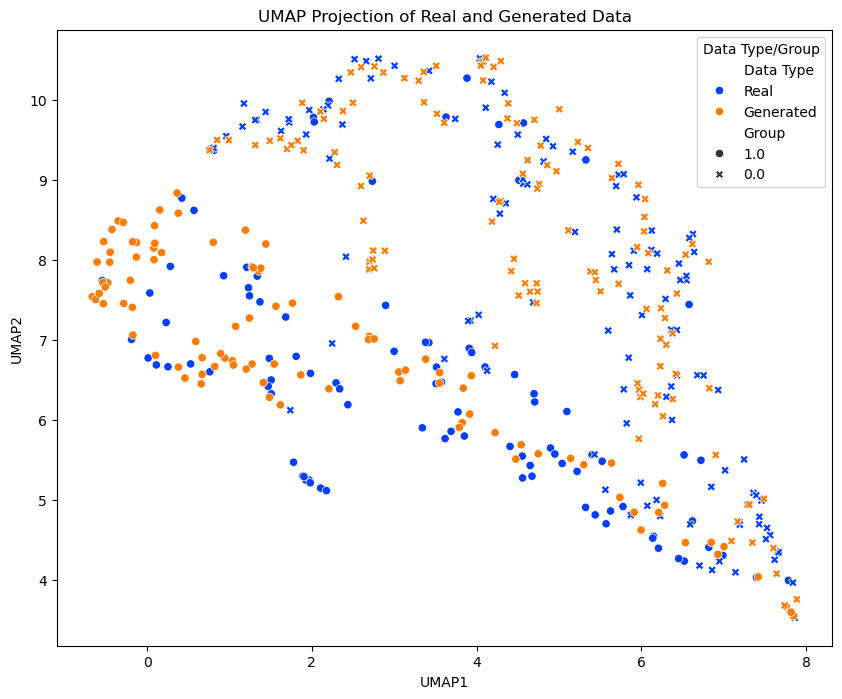

In [45]:
# === Input Real Data Description ===
# - 'samples': sample IDs (need to be removed)
# - 'groups': class labels (string or numeric; mapped to 0/1 if needed)
# - All other columns: raw feature values (e.g., expression counts)
# - The feature values in real need to be log-transformed: log2(real + 1)
real_file_name = r"\Case\PRADSubtype_icd_o_3_histology_test.csv" # Please replace it with your actual file path

# === Input Generated Data Description ===
# - generated.csv has the same columns as real except for samples
# - The features are already log-transformed
# - Group labels (0 or 1) are in the last column
generated_file_name = r"\Case\PRADSubtype_icd_o_3_histology_train_epoch70_batch02_CVAE1-20_generated.csv" # Please replace it with your actual file path

# Load and preprocess real and generated datasets:
# - real_data: log2-transformed numeric features from the real dataset
# - groups_real: binary-encoded labels (0/1) for the real data
# - generated_data: numeric features from the generated dataset
# - groups_generated: group labels from the generated data
# - unique_types: array of unique class labels (e.g., [0, 1])
real, groups_real, generated, groups_generated, unique_types = get_data_metrics(real_file_name, generated_file_name)

# Visualize and evaluate real vs. generated data:
# - Stratified sampling is performed within each group based on the real data
# - 'ratio' determines the fraction of real samples to visualize per class
# - Heatmaps show the expression patterns of both datasets
# - UMAP plots show group-wise structure in 2D space
# - If generated data is None, only real data is visualized
visualize(real, groups_real, unique_types, generated, groups_generated, ratio=1, seed=88)

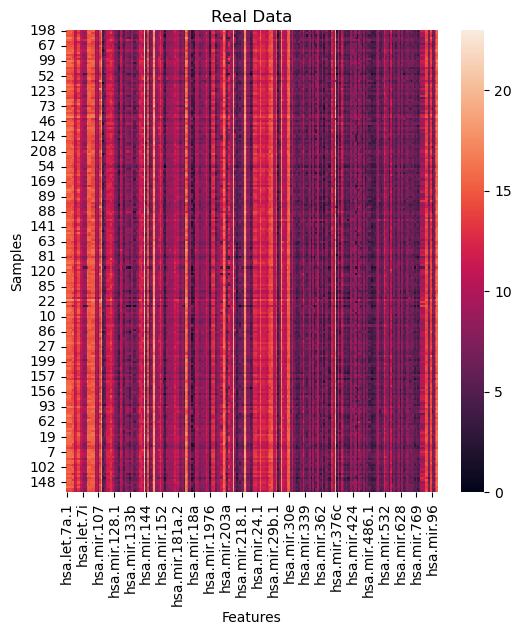

In [47]:
# If we only have the real samples...
visualize(real, groups_real, unique_types, ratio=1, seed=88)

# PRADSubtype classification accurary multiple classifier

In [15]:
# Create candidate sample sizes ranging from 'step' to the full size of real data
step = len(real) // 30
n_candidate = np.arange(step, len(real) + 1, step)
n_candidate = n_candidate[(n_candidate >= 12) & (n_candidate <= len(real))]

# Define target sizes that go beyond the candidate range (extrapolation)
n_target = np.array([n_candidate[-1] + x * step for x in range(1, 4)])
print(f'n_candidate: {n_candidate}\nn_target: {n_target}')

n_candidate: [ 14  21  28  35  42  49  56  63  70  77  84  91  98 105 112 119 126 133
 140 147 154 161 168 175 182 189 196 203 210]
n_target: [217 224 231]


In [ ]:
# Evaluate the classifier for real data
metric_real = eval_classifier(whole_generated=real,
                              whole_groups=groups_real,
                              n_candidate=n_candidate,
                              n_draw=30, log=True)

# Save the results to csv file if necessary
metric_real.to_csv(f'PRADSubtype_icd_o_3_histology_metric_real.csv', index=False)

In [ ]:
# Evaluate the classifier for generated data
metric_generated = eval_classifier(whole_generated=generated,
                                   whole_groups=groups_generated,
                                   n_candidate=n_candidate,
                                   n_draw=30, log=True)

# Save the results to csv file if necessary
metric_generated.to_csv(f'PRADSubtype_icd_o_3_histology_metric_generated.csv', index=False)

In [37]:
# If we have already saved the results
metric_real = pd.read_csv(f'PRADSubtype_icd_o_3_histology_metric_real.csv',header = 0)
metric_generated = pd.read_csv(f'PRADSubtype_icd_o_3_histology_metric_generated.csv',header = 0)

LOGIS
SVM
KNN
RF
XGB


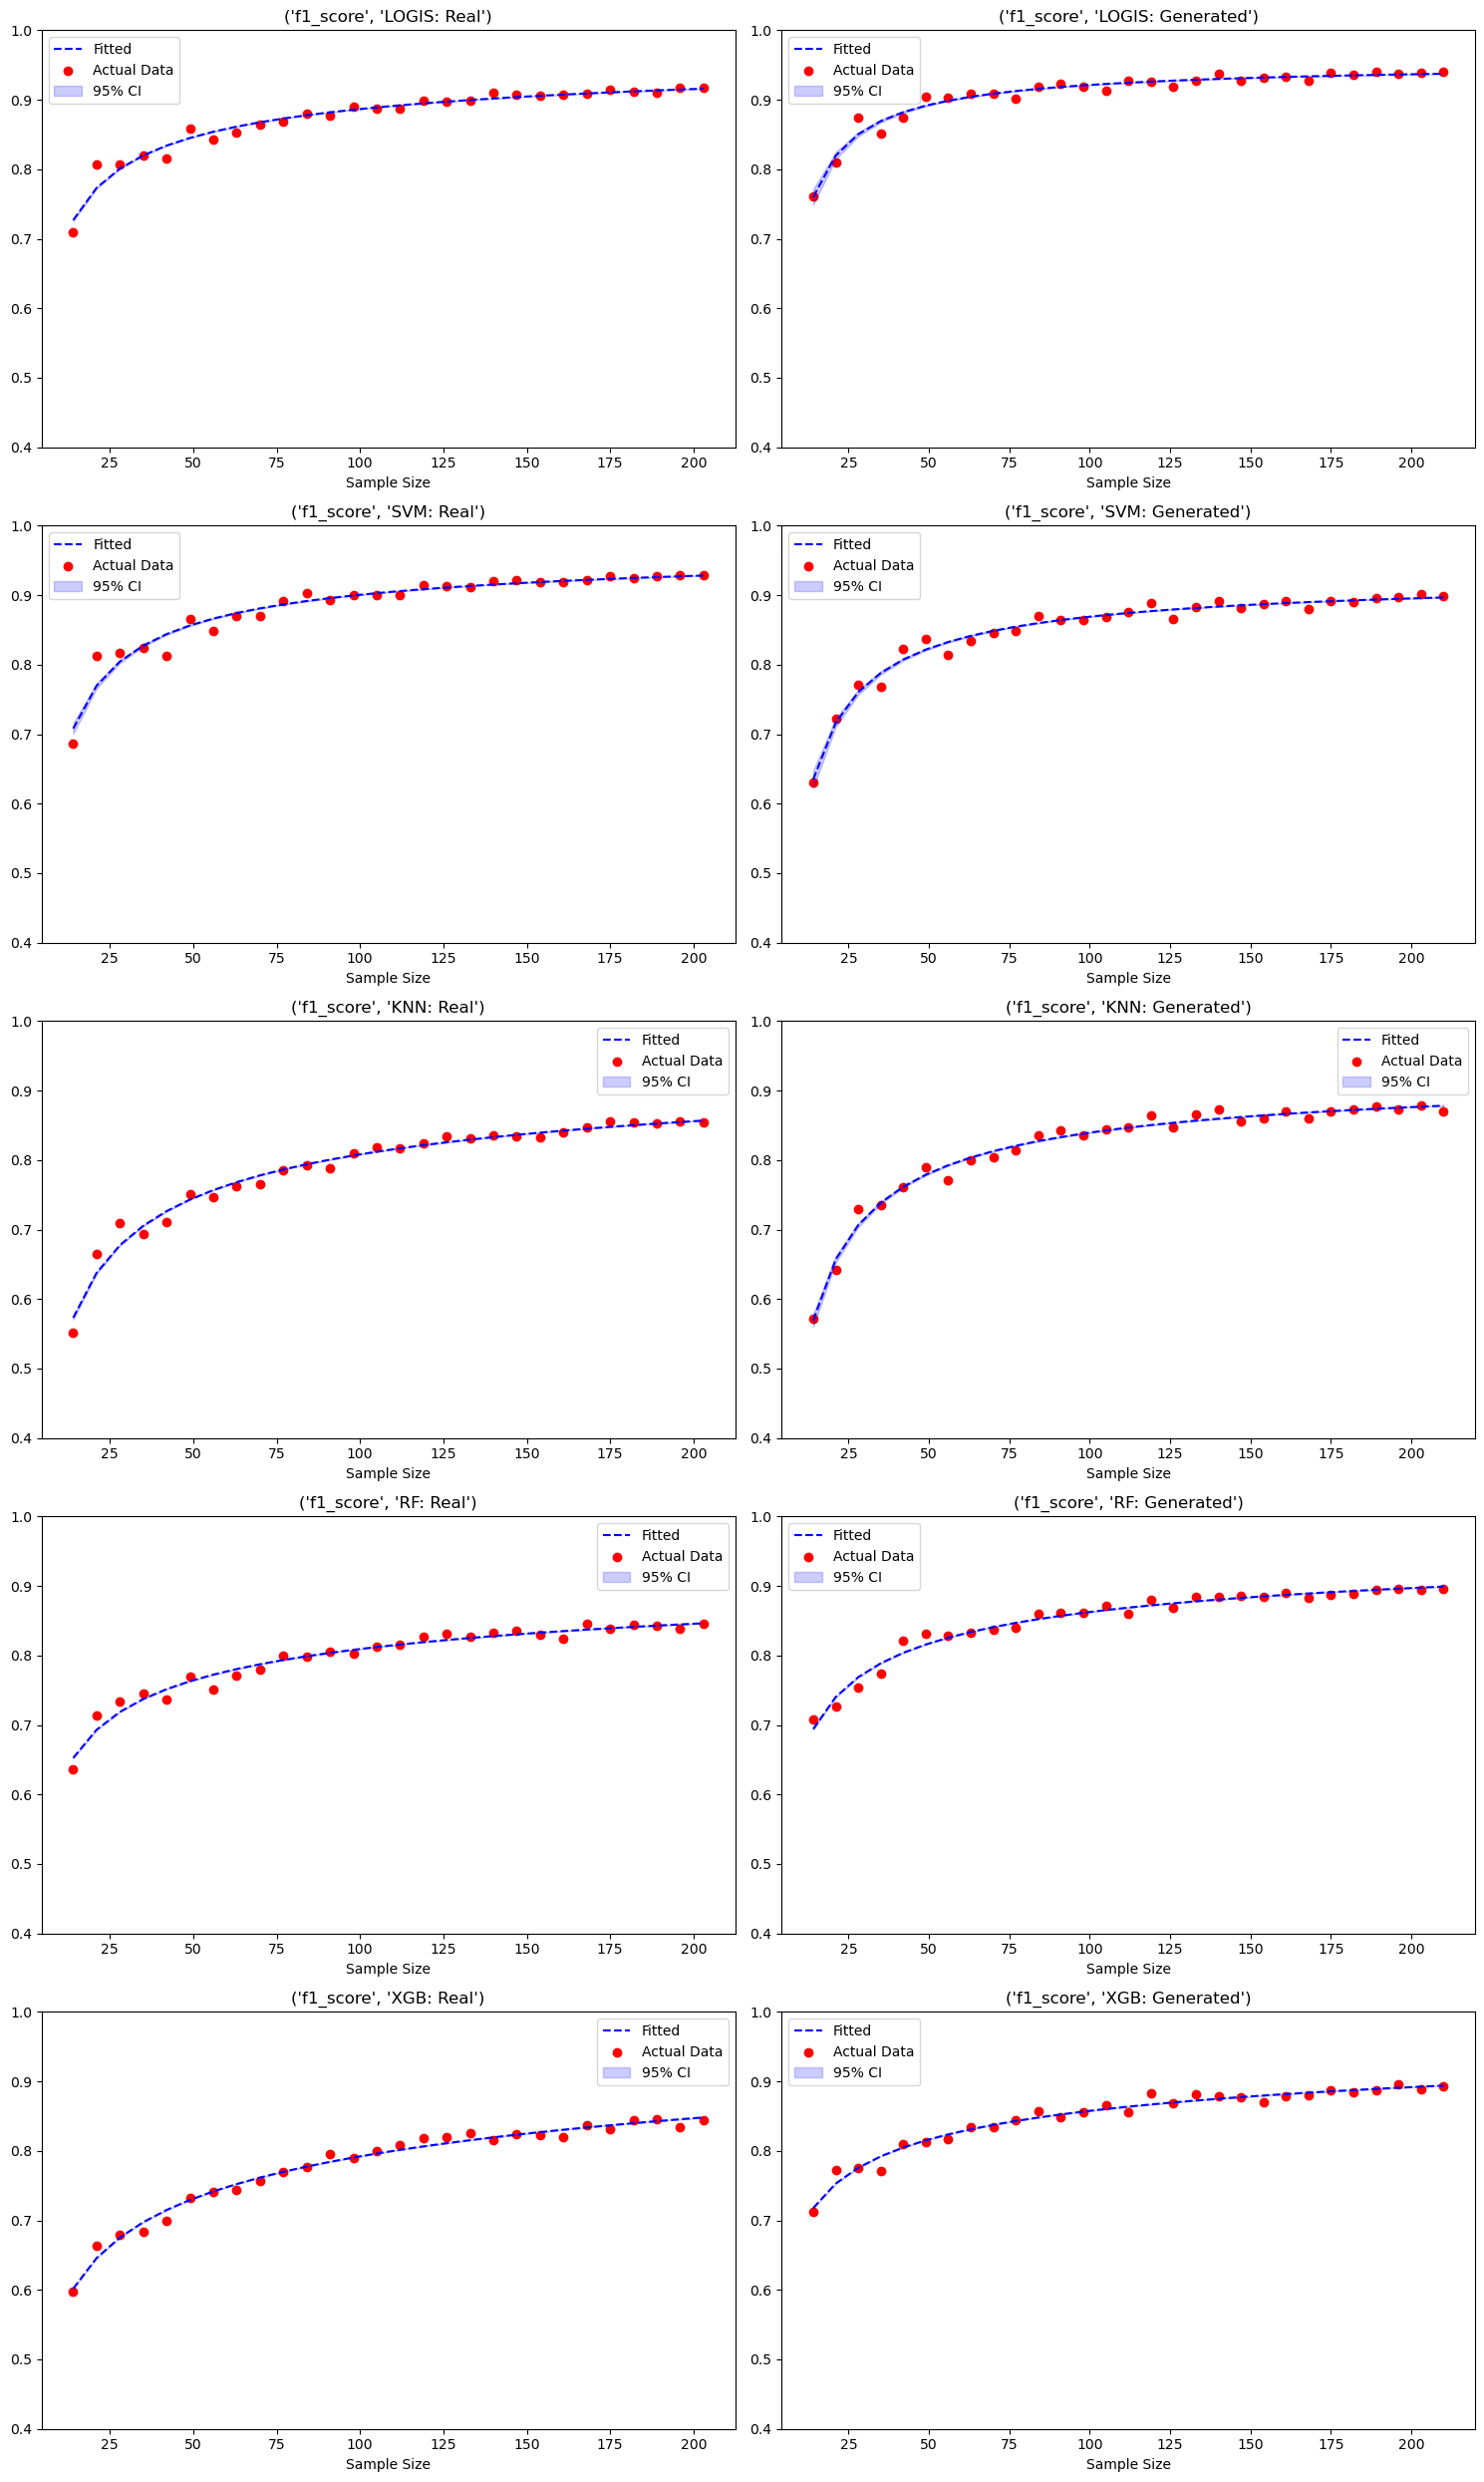

In [27]:
# Visualize the classifier performance
import matplotlib.pyplot as plt
p_acc = vis_classifier(metric_generated=metric_generated,
                       metric_real=metric_real,
                       metric_name='f1_score',
                       n_target=n_target)